# AI Agents Tutorial
작성 : 박광석(모두의연구소, https://www.linkedin.com/in/andkspark) , 2025.03
## 2. Microsoft Autogen AgentChat

AutoGen은 Microsoft에서 개발한 멀티 에이전트 프레임워크로,
여러 개의 LLM 기반 에이전트들이 역할을 나누고 상호작용하며 협업적으로 문제를 해결할 수 있도록 설계된 오픈소스 시스템입니다! AutoGen은 다음의 특징을 가지고 있습니다.  

🧠 대화 기반의 워크플로우 구성  
에이전트 간 메시지 기반 커뮤니케이션을 통해, 사용자가 정의한 목표에 따라 작업을 진행합니다.

⚙️ 역할 기반 설계  
각 에이전트는 ‘코드 작성자’, ‘검토자’, ‘실행자’ 등 구체적인 역할을 갖고, 협업 구조를 자유롭게 정의할 수 있습니다.

🔁 루프 기반 상호 피드백 구조  
하나의 에이전트가 출력한 결과를 다른 에이전트가 검토하고 피드백하며, 여러 라운드에 걸쳐 개선된 결과를 도출합니다.

🔌 LLM/툴 통합 유연성  
OpenAI, Azure, HuggingFace 등 다양한 LLM API를 연결할 수 있고, Python 코드 실행이나 외부 시스템 연동 또한 지원합니다.

위 내용을 버그 수정 프로세스의 예시를 들어 다시 설명해보겠습니다.

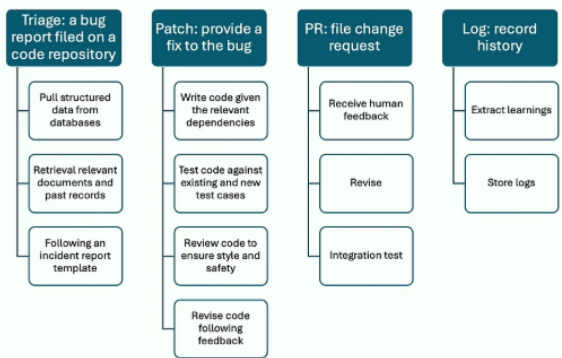

다음 버그 수정 워크플로우가 Autogen의 동작 방식을 잘 보여줍니다! 작업을 단위로 분해하고, 각각을 에이전트에 할당하여 수행하는 방식을 보여줍니다. 전체 워크플로우는 네 단계로, 각 세부 작업은 서로 다른 역할을 가진 에이전트가 맡아 병렬적이고 협력적으로 수행합니다.

1. Triage (버그 분류) 단계,

하나의 에이전트가 관련 데이터를 데이터베이스에서 추출하고,

다른 에이전트는 과거 사례 및 문서를 검색하며,

또 다른 에이전트는 정형화된 사고 보고서를 작성합니다.

2. Patch (버그 수정) 단계,

한 에이전트가 종속성에 맞춰 코드를 작성하고,

또 다른 에이전트는 테스트 케이스 기반으로 기능 검증을 수행합니다.

코드 스타일과 안정성을 리뷰하는 에이전트,

피드백을 반영해 코드를 수정하는 에이전트가 순차적으로 협업합니다.

3. PR (변경 요청) 단계,

한 에이전트가 PR에 대한 피드백을 수집하고,

또 다른 에이전트는 수정을 진행한 후,

통합 테스트를 담당하는 에이전트가 후속 검증을 수행합니다.

4. Log (기록) 단계,

한 에이전트가 학습 가능한 인사이트를 추출하고,

다른 에이전트는 결과를 로그로 저장합니다.

이처럼 AutoGen은 작업을 세분화하고 역할 기반의 에이전트를 조정하여, 사람의 개입 없이도 복잡한 엔지니어링 프로세스를 자동화할 수 있도록 지원합니다.

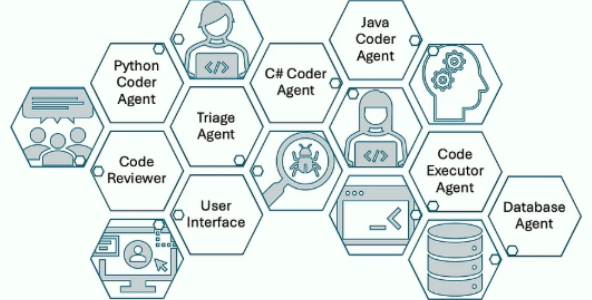

Autogen은 위에 설명했던 여러 에이전트를 내부적으로 구현, 가져다 쓸 수 있는 사용자 편의성을 제공하며, 사용자가 필요에 따라 에이전트와 도구를 직접 정의할 수도 있습니다!

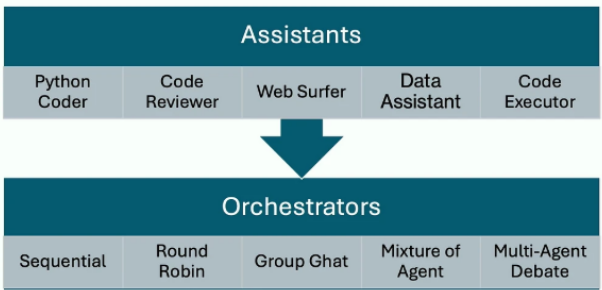

Autogen은 여러 형태로 에이전트간 소통할 수 있는 오케스트레이터를 함께 지원합니다.  
자세한 동작 방식은 다음 튜토리얼 - MultiAgent에서 소개해드릴게요!  

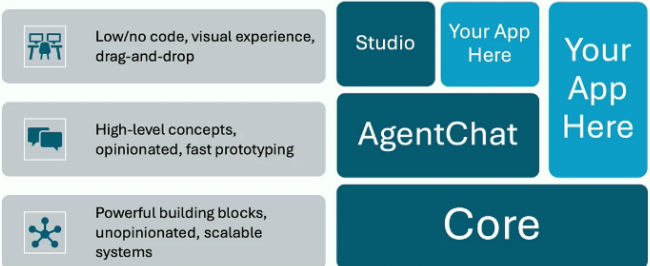

Autogen은 다음의 계층적 아키텍쳐를 가지고 있으며, 목표에 따라 선택하여 사용할 수 있습니다!   

🧱1. Core: 확장성과 유연성을 위한 기반 계층
AutoGen의 Core는 모듈화된 구성요소로 이루어진 핵심 빌딩 블록입니다.
사용자가 직접 시스템을 구성하고, 확장성과 통제력을 갖춘 커스터마이징 가능한 멀티 에이전트 프레임워크를 구축할 수 있도록 지원합니다.
낮은 수준의 제약으로, 복잡하고 대규모인 시스템을 구현하기에 적합합니다.  

💬 2. AgentChat: 빠른 프로토타이핑을 위한 고수준 API 계층
AgentChat은 다양한 역할의 에이전트를 생성하고, 이들 간의 대화 기반 협업 구조를 정의할 수 있는 고수준 프레임워크입니다.
의사결정 흐름을 텍스트 기반 인터페이스로 구성할 수 있어, 빠르게 실험하고 반복할 수 있는 환경을 제공합니다.
구조화된 대화형 시나리오 구현에 적합하며, 기본적인 에이전트 오케스트레이션 기능을 포함합니다.  

🎛️ 3. Studio: 비전문가도 사용할 수 있는 비주얼 에디터 계층
Studio는 시각화 중심의 UI를 제공하여 Low-code/No-code 환경에서 사용자가 직접 워크플로우를 설계하고 조정할 수 있게 해줍니다.
드래그 앤 드롭 방식으로 에이전트를 배치하고 연결할 수 있어, 개발자가 아니어도 쉽고 직관적으로 AutoGen 기반 앱을 구축할 수 있습니다.  
  
요약하자면,

Core → 확장성과 유연성 중심 (전문 개발자용)  
AgentChat → 실험과 구성 간소화 (AI 개발자/연구자용)  
Studio → 직관적인 시각 툴 (비개발자용)  
  
가 되겠습니다!

이번 튜토리얼은 AgentChat으로 진행됩니다!

### Step 0 : 설치와 준비  
Autogen 설치 및 Gemini API 키를 등록하도록 합니다.

In [ ]:
!pip install autogen
!pip install -U "autogen-agentchat"
!pip install "autogen-ext[openai]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.4/730.4 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.8/80.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.6/86.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.9/259.9 kB 6.3 MB/s eta 0:00:00


In [ ]:
import os

In [ ]:
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.conditions import TextMentionTermination
from autogen_ext.models.openai import OpenAIChatCompletionClient
from autogen_agentchat.messages import TextMessage

API KEY는 관리에 유의하시기 바랍니다!

In [ ]:
GOOGLE_API_KEY =

AutoGen은 복잡한 워크플로우를 가능하게 하는 오픈 소스 프레임워크로, 에이전트(agent)라는 개념을 중심으로 구성되어 있습니다!  
에이전트는 메시지를 주고받으며, 대형 언어 모델(LLM)이나 코드 실행기, 인간의 입력 등 다양한 구성 요소를 통해 응답을 생성할 수 있고, 외부 함수나 도구를 호출하여 특정 작업을 수행할 수 있도록 지원합니다.

### Step 1 : 에이전트 정의하기
Autogen에서는 이름과 시스템 메세지, 그리고 model client 만으로
매우 간편하게 에이전트를 정의할 수 있습니다!
  
model client는 "에이전트가 LLM(예: GPT-4)이랑 대화할 수 있게 해주는 연결 다리" 입니다. 다양한 모델의 API간의 다른 모델 호출 방식을 Autogen 코드 내에서 통일된 방식으로 접근할 수 있게 해줍니다.  
  
실습 코드에서 사용하는 OpenAIChatCompletionClient 는 OpenAI의 모델, 혹은 OpenAI API와 호환을 제공하는 모델 (예 : Gemini) 을 사용할 수 있습니다.  
그 외에도 Azure OpenAI models 을 지원하는 AzureOpenAIChatCompletionClient, Claude 등의 Anthropic 모델 /  Ollema 을 지원하는 AnthropicChatCompletionClient / OllamaChatCompletionClient 가 있으며, semanticp-kernel 을 이용해 mistral, aws, huggingface의 모델을 사용할 수 있는 SKChatCompletionAdapter 도 지원합니다.




In [ ]:
# Gemini 같이 OpenAI 모델이 아니면서 OpenAI API를 지원하는 경우 base_url 이 필요합니다
model_client=OpenAIChatCompletionClient(
    model="gemini-2.0-flash",
    api_key = GOOGLE_API_KEY,
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/"
    )

In [ ]:
agent = AssistantAgent(
    name="assistant",
    model_client=model_client,
    system_message="넌 정말 똑똑한 친구야!",
)

### Step 2 : 메세지 보내기

Autogen은 에이전트를 여럿 두고 대화를 주고받는 형태로 시스템을 구성합니다.  물론 유저 또한 에이전트와 대화를 주고받을 수 있습니다!  
단일 에이전트와 Message를 통하여 대화를 주고받아보도록 하겠습니다.

면밀한 관찰을 위해 해당 실습에서는 autogen을 비동기식 (async) 으로 사용합니다.비동기식으로 autogen을 사용할 경우, 지연상황을 발생시키지 않기 위해 CancellationToken을 함께 사용합니다.
  
CancellationToken은 autogen.core 라이브러리에 정의되어 있습니다.

In [ ]:
from autogen_core import CancellationToken

메세지에는 source가 함께 표기됩니다. 이후 진행해볼 에이전트간의 대화에서는 메세지를 발신한 에이전트의 정보가 표시됩니다.

In [ ]:
text_message = TextMessage(content="Hello World! Let's build with AI", source="User")
text_message

TextMessage(source='User', models_usage=None, metadata={}, content="Hello World! Let's build with AI", type='TextMessage')

정의한 메세지로 에이전트와 대화해보겠습니다.
on_messages 메소드를 사용하여 정의한 메세지를 주입합니다.

In [ ]:
response = await agent.on_messages(
    [text_message], cancellation_token=CancellationToken()
)
response.chat_message

TextMessage(source='assistant', models_usage=RequestUsage(prompt_tokens=187, completion_tokens=334), metadata={}, content="Okay, I'm ready to build! To start, can you give me a little more information about what you have in mind?  For example:\n\n*   **What kind of project are you interested in?**  (e.g., a web application, a game, a poem, a machine learning model, an automation script, etc.)\n*   **What are your goals for this project?** (e.g., learn a new skill, solve a specific problem, create something entertaining, etc.)\n*   **What are your existing skills and experience?** (e.g., are you a beginner, intermediate, or expert programmer? Do you have experience with specific AI tools or libraries?)\n*   **Do you have any specific ideas or constraints?** (e.g., you want to use a particular technology, you have a limited budget, etc.)\n\nThe more information you provide, the better I can help you get started.  I can assist with things like:\n\n*   **Brainstorming ideas:**  If you're n

답변은 메세지 객체로 돌아오며, 멤버 변수 content에 접근하여 모델의 출력을 확인할 수 있습니다.

In [ ]:
print("<USER> : ", text_message.content)
print("<ASSISTANT> : ", response.chat_message.content)

<USER> :  Hello World! Let's build with AI
<ASSISTANT> :  Okay, I'm ready to build! To start, can you give me a little more information about what you have in mind?  For example:

*   **What kind of project are you interested in?**  (e.g., a web application, a game, a poem, a machine learning model, an automation script, etc.)
*   **What are your goals for this project?** (e.g., learn a new skill, solve a specific problem, create something entertaining, etc.)
*   **What are your existing skills and experience?** (e.g., are you a beginner, intermediate, or expert programmer? Do you have experience with specific AI tools or libraries?)
*   **Do you have any specific ideas or constraints?** (e.g., you want to use a particular technology, you have a limited budget, etc.)

The more information you provide, the better I can help you get started.  I can assist with things like:

*   **Brainstorming ideas:**  If you're not sure what to build, I can suggest some possibilities based on your inte

### Step 3 : 툴 사용하기

Agent는 tool을 사용하여 작업을 수행할 수 있습니다.  
Autogen에서 내장형으로 graph RAG, Langchain, mcp, http 도구를 지원하며, 사용자가 tool을 함수로 정의하여 사용할 수도 있습니다.  
  
이 섹션에서는 사용자가 정의한 툴을 사용해보겠습니다.

In [ ]:
from autogen_core.tools import FunctionTool

In [ ]:
import re

async def calculate_expression_func(input_string : str) -> str:
    match = re.search(r'(\d+)\s*([x*/+-])\s*(\d+)', input_string)
    if match:
        num1 = int(match.group(1))
        operator = match.group(2)
        num2 = int(match.group(3))

        if operator == 'x' or operator == '*':
            result = num1 * num2
        elif operator == '/':
            result = num1 / num2
        elif operator == '+':
            result = num1 + num2
        elif operator == '-':
            result = num1 - num2

        result *= 100

        return result

    else:
        return None
        # 수식을 찾을 수 없는 경우도구 None 반환

연산 결과의 100배를 돌려주는 함수입니다..!  
함수 정의 후 도구를 생성해줍니다

In [ ]:
# Define a tool that searches the web for information.
calculate_tool = FunctionTool(calculate_expression_func, description = "100배로 반환해주는 도구")

Tool을 생성하면 내부적으로 Schema를 자동으로 생성합니다. 반환은 string으로 수행합니다.  

In [ ]:
calculate_tool.schema

{'name': 'calculate_expression_func',
 'description': '100배로 반환해주는 도구',
 'parameters': {'type': 'object',
  'properties': {'input_string': {'description': 'input_string',
    'title': 'Input String',
    'type': 'string'}},
  'required': ['input_string'],
  'additionalProperties': False},
 'strict': False}

어시스턴트에 도구를 쥐어주겠습니다!  
아래 정의한 것 처럼, [] 안에 사용할 도구를 넣어줍니다.

Reflect_on_tool_use 는 모델이 별개로 추론한 결과를 도구 사용 결과에 반영할 것인가를 결정합니다.

In [ ]:
agent = AssistantAgent(
    name="assistant",
    model_client=model_client,
    tools=[calculate_tool],
#    reflect_on_tool_use  = True,

    system_message="값을 잘 계산해줘 ",
)

In [ ]:
async def assistant_run() -> None:
    response = await agent.on_messages(
        [TextMessage(content="3 * 4 가 뭐야?", source="user")],
        cancellation_token=CancellationToken(),
    )
    print("Chat Message : ", response.chat_message)
    print("Chat Message : ", response.chat_message.content)

3 * 4 를 도구를 사용하여 연산한 값을 확인해봅시다!

In [ ]:
await assistant_run()

Chat Message :  source='assistant' models_usage=None metadata={} content='1200' type='ToolCallSummaryMessage'
Chat Message :  1200


모델이 별개로 추론한 결과를 함께 반영하면 어떻게 될까요? 확인해봅시다!  
어떤점이 달라지는지 관찰해보세요 :D

### Step 4 : 팀으로 일하기

두 에이전트의 협업은 어떻게 이루어질까요?  
앞서 언급하였듯, 에이전트는 대화를 통해 메세지를 주고받습니다.  
그리고 받은 메세지를 기반으로 탑재된 llm을 통해 추론 후, 메세지를 다시 보내는 동작을 수행합니다.

In [ ]:
from autogen_agentchat.conditions import ExternalTermination, TextMentionTermination
from autogen_agentchat.teams import RoundRobinGroupChat
from autogen_agentchat.ui import Console


시를 쓰는 시인 에이전트와, 쓴 시에 피드백을 돌려주는 비평가 에이전트의 대화를 살펴봅시다!  
비평가가 허가 "APPROVE" 할떄까지, 시인 에이전트는 계속 시를 작성해야 합니다.  

In [ ]:
# Create the primary agent.
poet_agent = AssistantAgent(
    "primary",
    model_client=model_client,
    system_message="You are a helpful AI assistant.",
)

# Create the critic agent.
critic_agent = AssistantAgent(
    "critic",
    model_client=model_client,
    system_message="건설적인 피드백을 주세요! 당신의 피드백이 반영된 결과를 답변으로 받았을 때, 'APPROVE' 라는 말을 포함하여 회신해주세요",
)

# Define a termination condition that stops the task if the critic approves.
text_termination = TextMentionTermination("APPROVE")

에이전트의 대화 방식은 여러가지가 있는데요, 일단 Round robin 방식으로 대화를 나눠봅시다!  
Round robin 은 각 참가자가 돌아가며 대화를 나누는 방식입니다.  
Autogen 에서는 한 에이전트가 supervisor가 되서 다른 에이전트들이 작업을 잘 수행하는지 점검하는 MagenticOneGroupChat, 다음 에이전트를 선택하여 분기를 생성할 수 있는 SelectorGroupChat 등을 함께 지원합니다.  
자세한 내용은 [여기](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.teams.html)에서 확인하실 수 있습니다.

대화에 참여할 에이전트들을 팀으로 배정한 후, 대화를 진행시켜봅시다!  
앞서 선언한 대화 종료 조건을 포함하는 것을 잊지 마세요 :D

In [ ]:
# Create a team with the primary and critic agents.
team = RoundRobinGroupChat([poet_agent, critic_agent], termination_condition=text_termination)

In [ ]:
result = await team.run(task="봄에 잘 어울리는 사랑에 관한 짧은 시를 써줘")
print(result)

TaskResult(messages=[TextMessage(source='user', models_usage=None, metadata={}, content='봄에 잘 어울리는 사랑에 관한 짧은 시를 써줘', type='TextMessage'), TextMessage(source='primary', models_usage=RequestUsage(prompt_tokens=25, completion_tokens=77), metadata={}, content='싱그러운 새싹처럼\n설레는 바람결처럼\n어느새 스며든 그대 향기\n\n따스한 햇살 아래\n피어나는 꽃잎처럼\n두 볼 붉게 물든 사랑\n\n봄날의 꿈결처럼\n영원히 함께하고픈\n사랑스러운 나의 그대\n', type='TextMessage'), TextMessage(source='critic', models_usage=RequestUsage(prompt_tokens=140, completion_tokens=401), metadata={}, content='정말 아름다운 시네요! 봄의 싱그러움과 사랑의 설렘이 잘 어우러져 있습니다. 몇 가지 부분을 조금 더 다듬으면 더욱 완성도 높은 시가 될 것 같아요.\n\n**제안 1:**\n\n*   **현재:** "어느새 스며든 그대 향기"\n*   **변경 제안:** "어느새 스며든 그대 미소" 또는 "어느새 스며든 그대 숨결"\n\n    *   **이유:** \'향기\'도 좋지만, \'미소\'나 \'숨결\'과 같이 조금 더 직접적인 표현을 사용하면 사랑하는 감정이 더욱 생생하게 전달될 수 있습니다.\n\n**제안 2:**\n\n*   **현재:** "두 볼 붉게 물든 사랑"\n*   **변경 제안:** "두 볼 붉게 물들이는 사랑"\n\n    *   **이유:** \'물든 사랑\'은 다소 추상적으로 느껴질 수 있습니다. \'물들이는 사랑\'이라고 표현하면 사랑이라는 감정이 주체가 되어 볼을 붉게 물들이는 역동적인 느낌을 줄 수 있습니다.\n\n**전체 수정 예시:**

In [ ]:
for message in result.messages:
    print("<소스 : ", message.source, ">" , message.content)

<소스 :  user > 봄에 잘 어울리는 사랑에 관한 짧은 시를 써줘
<소스 :  primary > 싱그러운 새싹처럼
설레는 바람결처럼
어느새 스며든 그대 향기

따스한 햇살 아래
피어나는 꽃잎처럼
두 볼 붉게 물든 사랑

봄날의 꿈결처럼
영원히 함께하고픈
사랑스러운 나의 그대

<소스 :  critic > 정말 아름다운 시네요! 봄의 싱그러움과 사랑의 설렘이 잘 어우러져 있습니다. 몇 가지 부분을 조금 더 다듬으면 더욱 완성도 높은 시가 될 것 같아요.

**제안 1:**

*   **현재:** "어느새 스며든 그대 향기"
*   **변경 제안:** "어느새 스며든 그대 미소" 또는 "어느새 스며든 그대 숨결"

    *   **이유:** '향기'도 좋지만, '미소'나 '숨결'과 같이 조금 더 직접적인 표현을 사용하면 사랑하는 감정이 더욱 생생하게 전달될 수 있습니다.

**제안 2:**

*   **현재:** "두 볼 붉게 물든 사랑"
*   **변경 제안:** "두 볼 붉게 물들이는 사랑"

    *   **이유:** '물든 사랑'은 다소 추상적으로 느껴질 수 있습니다. '물들이는 사랑'이라고 표현하면 사랑이라는 감정이 주체가 되어 볼을 붉게 물들이는 역동적인 느낌을 줄 수 있습니다.

**전체 수정 예시:**

싱그러운 새싹처럼
설레는 바람결처럼
어느새 스며든 그대 미소

따스한 햇살 아래
피어나는 꽃잎처럼
두 볼 붉게 물들이는 사랑

봄날의 꿈결처럼
영원히 함께하고픈
사랑스러운 나의 그대

이 제안들이 마음에 드신다면, 자유롭게 수정하여 더 멋진 시를 완성해 보세요!

<소스 :  primary > 정성스러운 피드백 정말 감사합니다! 말씀해주신 부분을 반영하여 더욱 생생하고 감성적인 시로 다듬어 보았습니다.

**수정된 시:**

싱그러운 새싹처럼
설레는 바람결처럼
어느새 스며든 그대 미소

따스한 햇살 아래
피어나는 꽃잎처럼
두 볼 붉게 물들이는 사랑

아련한 봄 꿈결처럼
영원히 함께 걷고픈
사랑스러운 나의 그대

**수정 사항:**

*   

가끔 한번에 APPROVE를 받는 경우도 보이네요!    
어떤 경우에 챗이 종료가 되는지는 결과의 stop_reason 멤버 변수로 확인할 수 있습니다!

In [ ]:
result.stop_reason

"Text 'APPROVE' mentioned"

### Step 5 : 콘솔로 출력해보기

메세지를 따로 받아서 조작할 필요가 없는 경우 console을 활용하는 것도 간편합니다  

In [ ]:
await team.reset()  # Reset the team for a new task.
await Console(team.run_stream(task="봄에 잘 어울리는 사랑에 관한 짧은 시를 써줘"))  # Stream the messages to the console.

---------- user ----------
봄에 잘 어울리는 사랑에 관한 짧은 시를 써줘
---------- primary ----------
새싹 돋는 가지 위에
사랑 두 글자 피어나
설레는 바람결 따라
네 맘에 닿기를 바라

햇살 아래 마주 보며
수줍은 미소 주고받고
어색한 침묵 흐르는 길
함께 걷는 봄날의 꿈

꽃잎처럼 여린 사랑
조심스레 키워갈래요
따스한 봄 햇살 아래
영원히 함께할래요

---------- critic ----------
## 피드백:

전반적으로 봄의 따스함과 사랑의 설렘을 잘 표현한 아름다운 시입니다. 몇 가지 개선할 부분을 제안합니다.

1.  **구체적인 이미지 활용:** 추상적인 표현("사랑 두 글자", "네 맘") 대신, 봄과 사랑을 연상시키는 더욱 구체적인 이미지를 사용하면 시가 더욱 생생하게 다가올 것입니다. 예를 들어, "분홍빛 벚꽃잎에/ 사랑 새겨 너에게 보낸다" 와 같이 시각적인 이미지를 활용할 수 있습니다.

2.  **감정의 깊이 더하기:** "수줍은 미소", "어색한 침묵"과 같은 표현은 좋지만, 사랑의 감정을 더욱 깊이 있게 표현할 수 있습니다. 예를 들어, "두근거리는 가슴 안고", "떨리는 목소리로 속삭이는" 등 감각적인 묘사를 추가하면 독자가 감정을 더욱 잘 느낄 수 있습니다.

3.  **시의 흐름 개선:** 각 연의 연결이 다소 매끄럽지 않은 부분이 있습니다. 각 연이 자연스럽게 이어지도록 문장 구조나 내용을 조정하면 시의 흐름이 더욱 부드러워질 것입니다. 예를 들어, 2연의 마지막 구절과 3연의 첫 구절 사이에 인과 관계나 시간적 흐름을 명확히 연결하면 좋습니다.

## 수정 제안:

**분홍빛 벚꽃 가지에**
**사랑 한 잎 피워내어**
**설레는 바람결 타고**
**네 창가에 살며시 놓아**

**햇살 아래 마주 보며**
**두근거리는 가슴 안고**
**어색한 침묵 흐르는 길**
**손끝 스치는 봄날의 꿈**

**꽃잎처럼 여린 사랑**
**조심스레 키워갈래요**
**따스한 봄 햇살 아래*

TaskResult(messages=[TextMessage(source='user', models_usage=None, metadata={}, content='봄에 잘 어울리는 사랑에 관한 짧은 시를 써줘', type='TextMessage'), TextMessage(source='primary', models_usage=RequestUsage(prompt_tokens=25, completion_tokens=115), metadata={}, content='새싹 돋는 가지 위에\n사랑 두 글자 피어나\n설레는 바람결 따라\n네 맘에 닿기를 바라\n\n햇살 아래 마주 보며\n수줍은 미소 주고받고\n어색한 침묵 흐르는 길\n함께 걷는 봄날의 꿈\n\n꽃잎처럼 여린 사랑\n조심스레 키워갈래요\n따스한 봄 햇살 아래\n영원히 함께할래요\n', type='TextMessage'), TextMessage(source='critic', models_usage=RequestUsage(prompt_tokens=178, completion_tokens=555), metadata={}, content='## 피드백:\n\n전반적으로 봄의 따스함과 사랑의 설렘을 잘 표현한 아름다운 시입니다. 몇 가지 개선할 부분을 제안합니다.\n\n1.  **구체적인 이미지 활용:** 추상적인 표현("사랑 두 글자", "네 맘") 대신, 봄과 사랑을 연상시키는 더욱 구체적인 이미지를 사용하면 시가 더욱 생생하게 다가올 것입니다. 예를 들어, "분홍빛 벚꽃잎에/ 사랑 새겨 너에게 보낸다" 와 같이 시각적인 이미지를 활용할 수 있습니다.\n\n2.  **감정의 깊이 더하기:** "수줍은 미소", "어색한 침묵"과 같은 표현은 좋지만, 사랑의 감정을 더욱 깊이 있게 표현할 수 있습니다. 예를 들어, "두근거리는 가슴 안고", "떨리는 목소리로 속삭이는" 등 감각적인 묘사를 추가하면 독자가 감정을 더욱 잘 느낄 수 있습니다.\n\n3.  **시의 흐름 개선:** 각 연의 연결이 다소 매끄럽지 않은 부분이

출력이 어떻게 되는지 확인하셨나요?  
아래 같이 나오는 TaskResult의 경우, await Console(team.run_stream()) 이 반환하는 값을 받아주는 변수를 선언한다면 출력되지 않습니다.  

### Step 6 : Human in the loop

유저 또한 UserProxyAgent로 에이전트간의 대화에 참여할 수 있습니다!  


In [ ]:
from autogen_agentchat.agents import UserProxyAgent

In [ ]:
user_proxy = UserProxyAgent("user_proxy", input_func=input)

대화 종료를 위해 종료 조건을 설정해봅시다  
위에 설정한대로, 대화를 마치기 위해서는 APPROVE를, 피드백을 주고 싶다면 원하는 명령을 입력하세요!

In [ ]:
# Create a team with the primary and critic agents.
team = RoundRobinGroupChat([poet_agent, user_proxy], termination_condition=text_termination)

In [ ]:
stream = team.run_stream(task="봄에 잘 어울리는 사랑에 관한 짧은 시를 써줘")

In [ ]:
await Console(stream)  # Stream the messages to the console.

---------- user ----------
봄에 잘 어울리는 사랑에 관한 짧은 시를 써줘
---------- primary ----------
## 봄, 사랑의 시작

**벚꽃 흩날리는 길,**
**두 손 맞잡고 걷는 우리.**

**싱그러운 새싹처럼,**
**풋풋한 사랑이 움트네.**

**따스한 햇살 아래,**
**그대 미소에 녹아드네.**

**봄바람 실어오는,**
**사랑의 속삭임 들리나요?**

Enter your response: 다시
---------- user_proxy ----------
다시
---------- primary ----------
알겠습니다. 다른 느낌으로 다시 써 드릴게요.

**잔디 위 낮잠처럼**

간지러운 햇살 아래
나란히 누워 속삭이는
어린 풀잎 같은 사랑

네 웃음소리 들려오면
겨우내 닫혀있던
내 맘에도 꽃이 피네

봄은 짧고 사랑은 영원하길
간절히 기도하는 밤
별빛 아래 두 손을 잡고

Enter your response: APPROVE
---------- user_proxy ----------
APPROVE


TaskResult(messages=[TextMessage(source='user', models_usage=None, metadata={}, content='봄에 잘 어울리는 사랑에 관한 짧은 시를 써줘', type='TextMessage'), TextMessage(source='primary', models_usage=RequestUsage(prompt_tokens=158, completion_tokens=100), metadata={}, content='## 봄, 사랑의 시작\n\n**벚꽃 흩날리는 길,**\n**두 손 맞잡고 걷는 우리.**\n\n**싱그러운 새싹처럼,**\n**풋풋한 사랑이 움트네.**\n\n**따스한 햇살 아래,**\n**그대 미소에 녹아드네.**\n\n**봄바람 실어오는,**\n**사랑의 속삭임 들리나요?**\n', type='TextMessage'), UserInputRequestedEvent(source='user_proxy', models_usage=None, metadata={}, request_id='75af2d39-6f78-4267-a1d4-5555298d15dd', content='', type='UserInputRequestedEvent'), TextMessage(source='user_proxy', models_usage=None, metadata={}, content='다시', type='TextMessage'), TextMessage(source='primary', models_usage=RequestUsage(prompt_tokens=260, completion_tokens=115), metadata={}, content='알겠습니다. 다른 느낌으로 다시 써 드릴게요.\n\n**잔디 위 낮잠처럼**\n\n간지러운 햇살 아래\n나란히 누워 속삭이는\n어린 풀잎 같은 사랑\n\n네 웃음소리 들려오면\n겨우내 닫혀있던\n내 맘에도 꽃이 피네\n\n봄은 짧고 사랑은 영원하길\n간절히 기도하는 밤\n별빛 아래 두 손을 

수고하셨습니다!